In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [88]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    return img

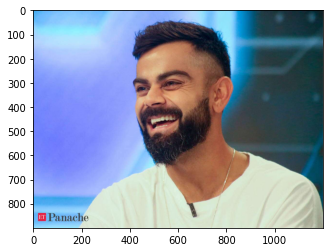

In [89]:
filename = 'image.jpg'
img=read_file(filename)

In [90]:
def edge_mask(img,line_size,blur_value):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray,blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur,255 , cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size , blur_value)
    return edges

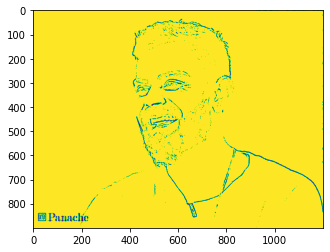

In [91]:
line_size , blur_value = 5,5
edges = edge_mask(img,line_size , blur_value)
plt.imshow(edges)

In [92]:
def color_quantization(img , k):
    data = np.float32(img).reshape((-1,3))
    
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    
    ret ,label , center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result

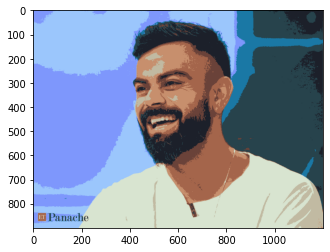

In [118]:
img = color_quantization(img,k=10)
plt.imshow(img)

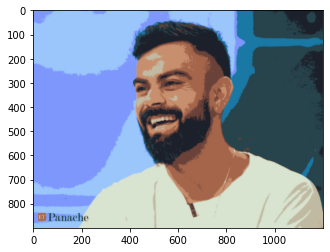

In [119]:
blurred = cv2.bilateralFilter(img,d = 7 ,sigmaColor=200,sigmaSpace = 200)
    
plt.imshow(blurred)

In [120]:
def cartoon():
    c = cv2.bitwise_and(blurred,blurred,mask=edges)
    
    plt.imshow(c)

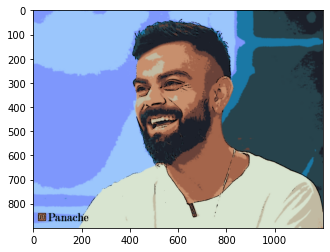

In [121]:
cartoon()

In [125]:
#original Image to Cartoonified Image
def cartoonified():
    org_img = read_file(image_name)
    edge = edge_mask(org_img,line_size=5 , blur_value=5)
    org_img = color_quantization(org_img,k=15)
    blurred_img = cv2.bilateralFilter(org_img,d = 7 ,sigmaColor=200,sigmaSpace = 200)
    ci = cv2.bitwise_and(blurred_img,blurred_img,mask=edge)
    
    plt.imshow(ci)
    
    

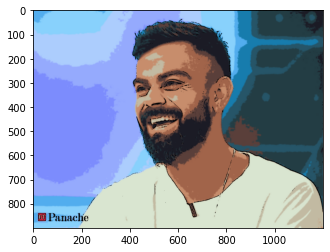

In [126]:
image_name = 'image.jpg'
cartoonified()